# predict car price linear regression algorithm

**import required library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

**load dataset**

In [3]:
url="C:\\Users\\afla1\\Downloads\\CarPrice_Assignment.csv"
car_data=pd.read_csv(url)
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**data preprocessing**

In [4]:
#drop missing values
car_data=car_data.dropna()
car_data


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car_data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
car_data.shape

(205, 26)

In [8]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
car_data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')>

In [10]:
car_data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
car_data.value_counts()

car_ID  symboling  CarName                          fueltype  aspiration  doornumber  carbody      drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
1        3         alfa-romero giulia               gas       std         two         convertible  rwd         front           88.6       168.8      64.1      48.8       2548        dohc        four            130         mpfi        3.47       2.68    9.00              111         5000     21       27          13495.0    1
142      0         subaru                           gas       std         four        sedan        fwd         front           97.2       172.0      65.4      52.5       2145        ohcf        four            108         2bbl        3.62       2.64    9.50              82          4800     32       37          7126.0     1
132      2         renault 

In [12]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
car_data.duplicated().sum()

0

In [17]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [18]:
CompanyName = car_data['CarName'].apply(lambda x:x.split(' ')[0])
car_data.insert(3,'CompanyName',CompanyName)
car_data.drop(['CarName'],axis = 1,inplace = True)
car_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
corrections = {
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}
car_data['CompanyName'] = car_data['CompanyName'].replace(corrections)
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
car_data['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [22]:
# changing the datatype of symboling from integer to string as it is categorical variable
car_data['symboling'] = car_data['symboling'].astype(str)

In [23]:
#separate numerical and categorical variables

numerical_vars = []
categorical_vars = []

for col in car_data.columns:
    if car_data[col].dtype == 'object':
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

#dispaly the lists
print('\nNumerical variables:\n', numerical_vars)
print('\nCategorical variables:\n', categorical_vars)


Numerical variables:
 ['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Categorical variables:
 ['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


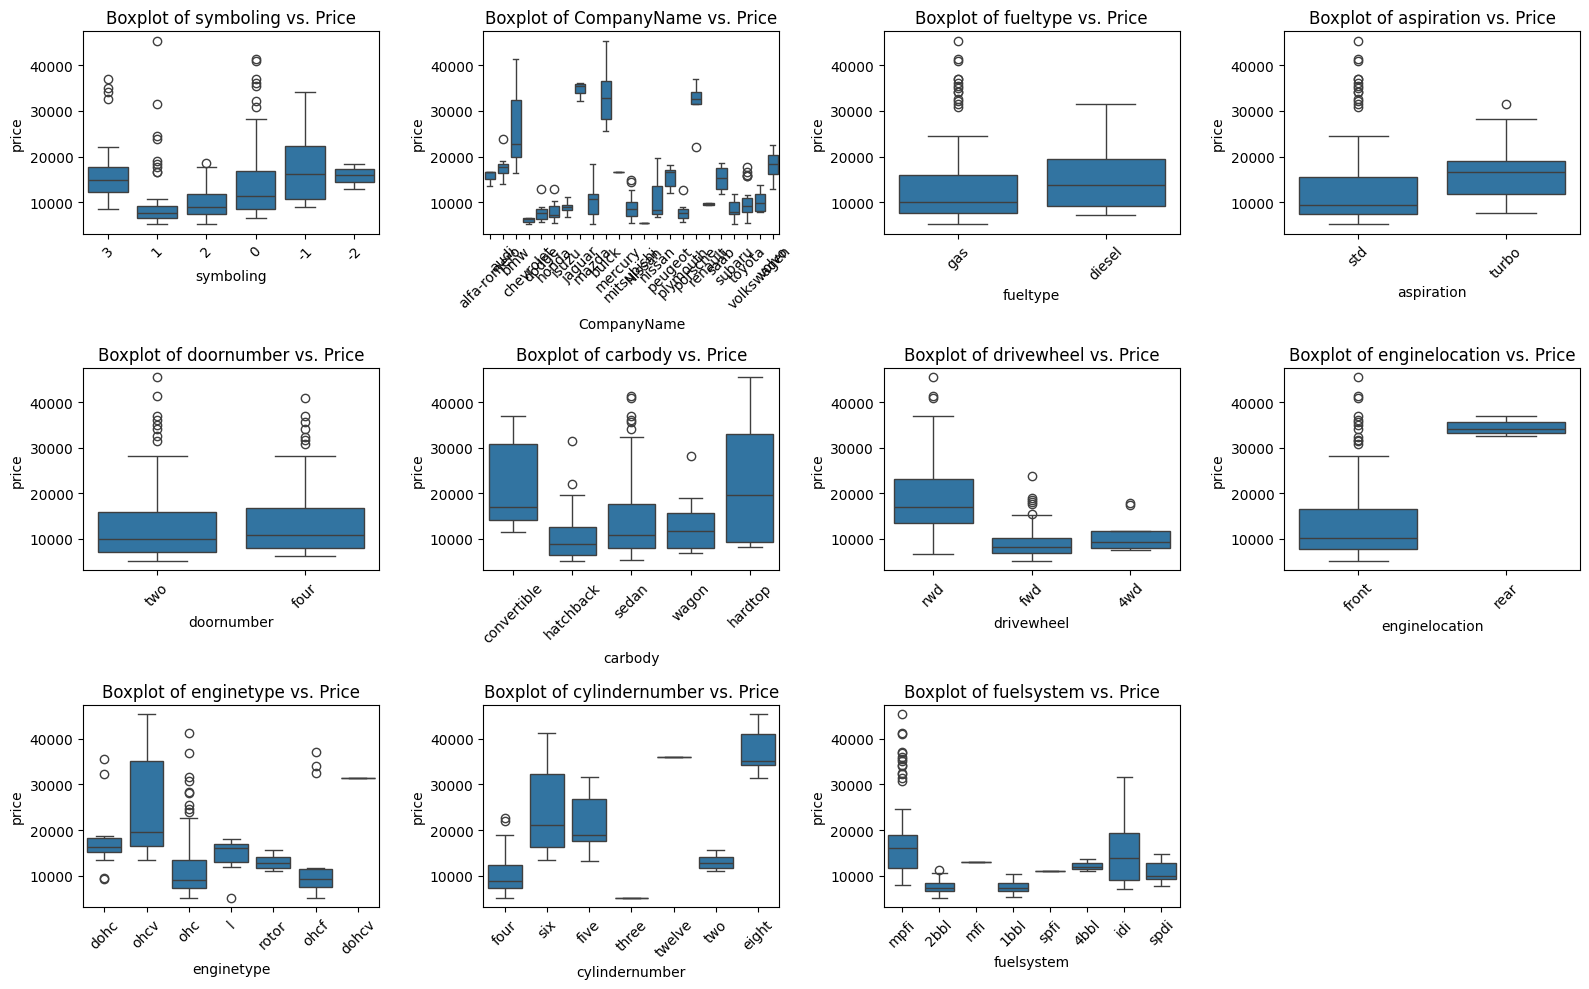

In [24]:
#create boxplot for each categorical variable against the target variable
plt.figure(figsize = (16,10))
for i,col in enumerate(categorical_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=col, y= 'price', data=car_data)
    plt.title(f'Boxplot of {col} vs. Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

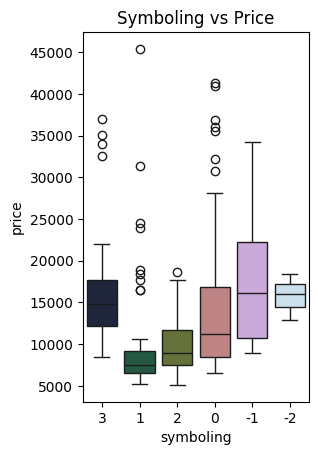

In [25]:


plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car_data.symboling, y=car_data.price, palette=('cubehelix'))

plt.show()

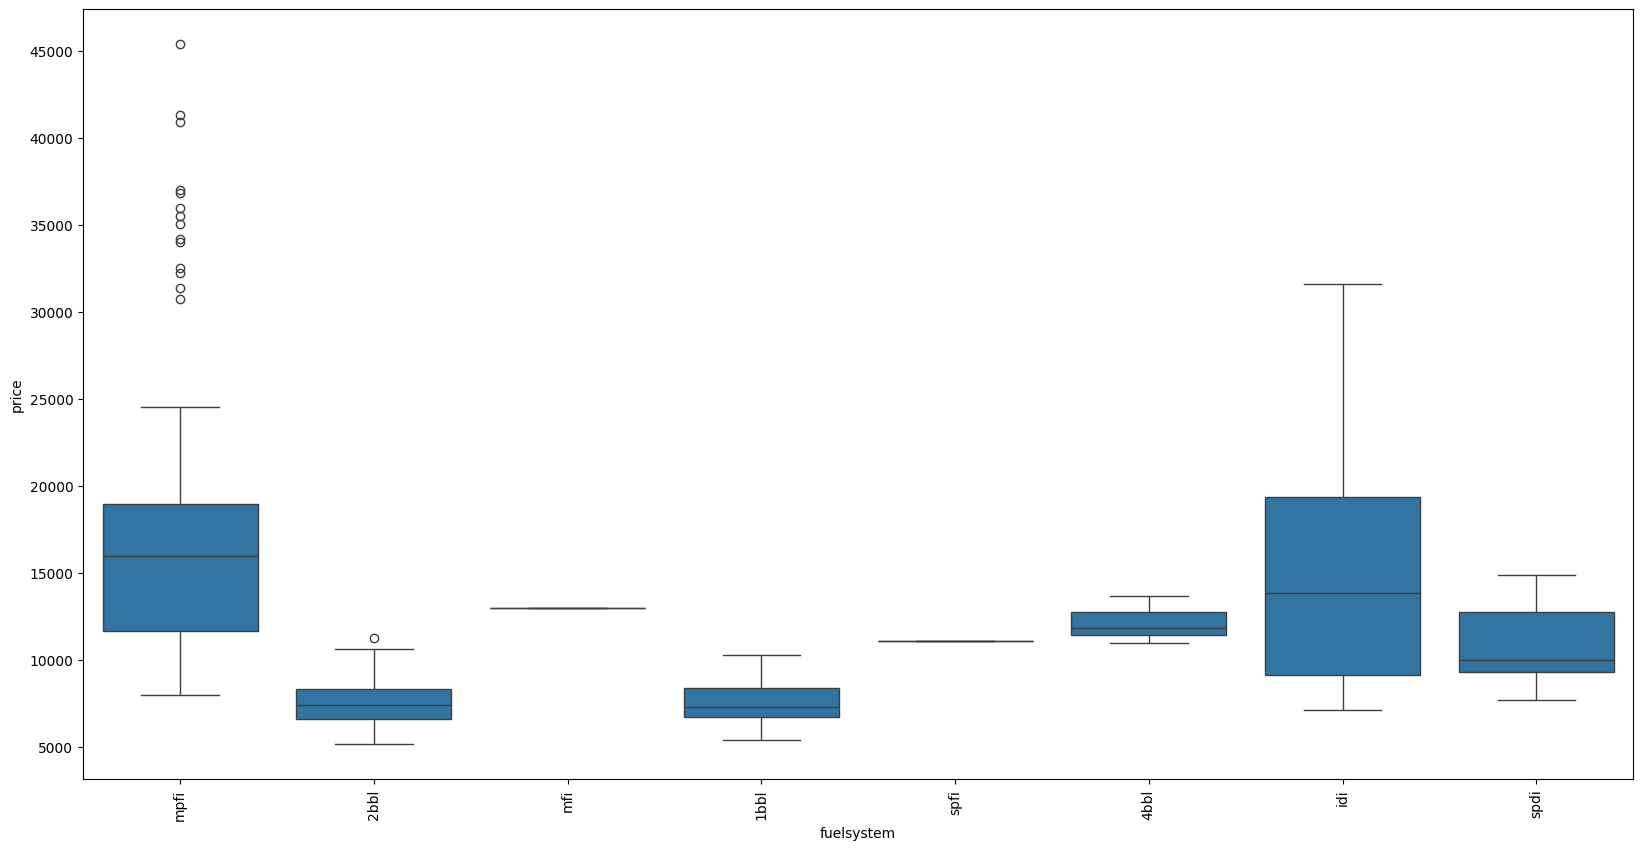

Average US car price:  13276.710570731706
CompanyName
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_vars[-1], y = 'price', data =car_data)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car_data['price'].mean())
print(car_data.groupby('CompanyName').price.mean().sort_values(ascending=False).head())

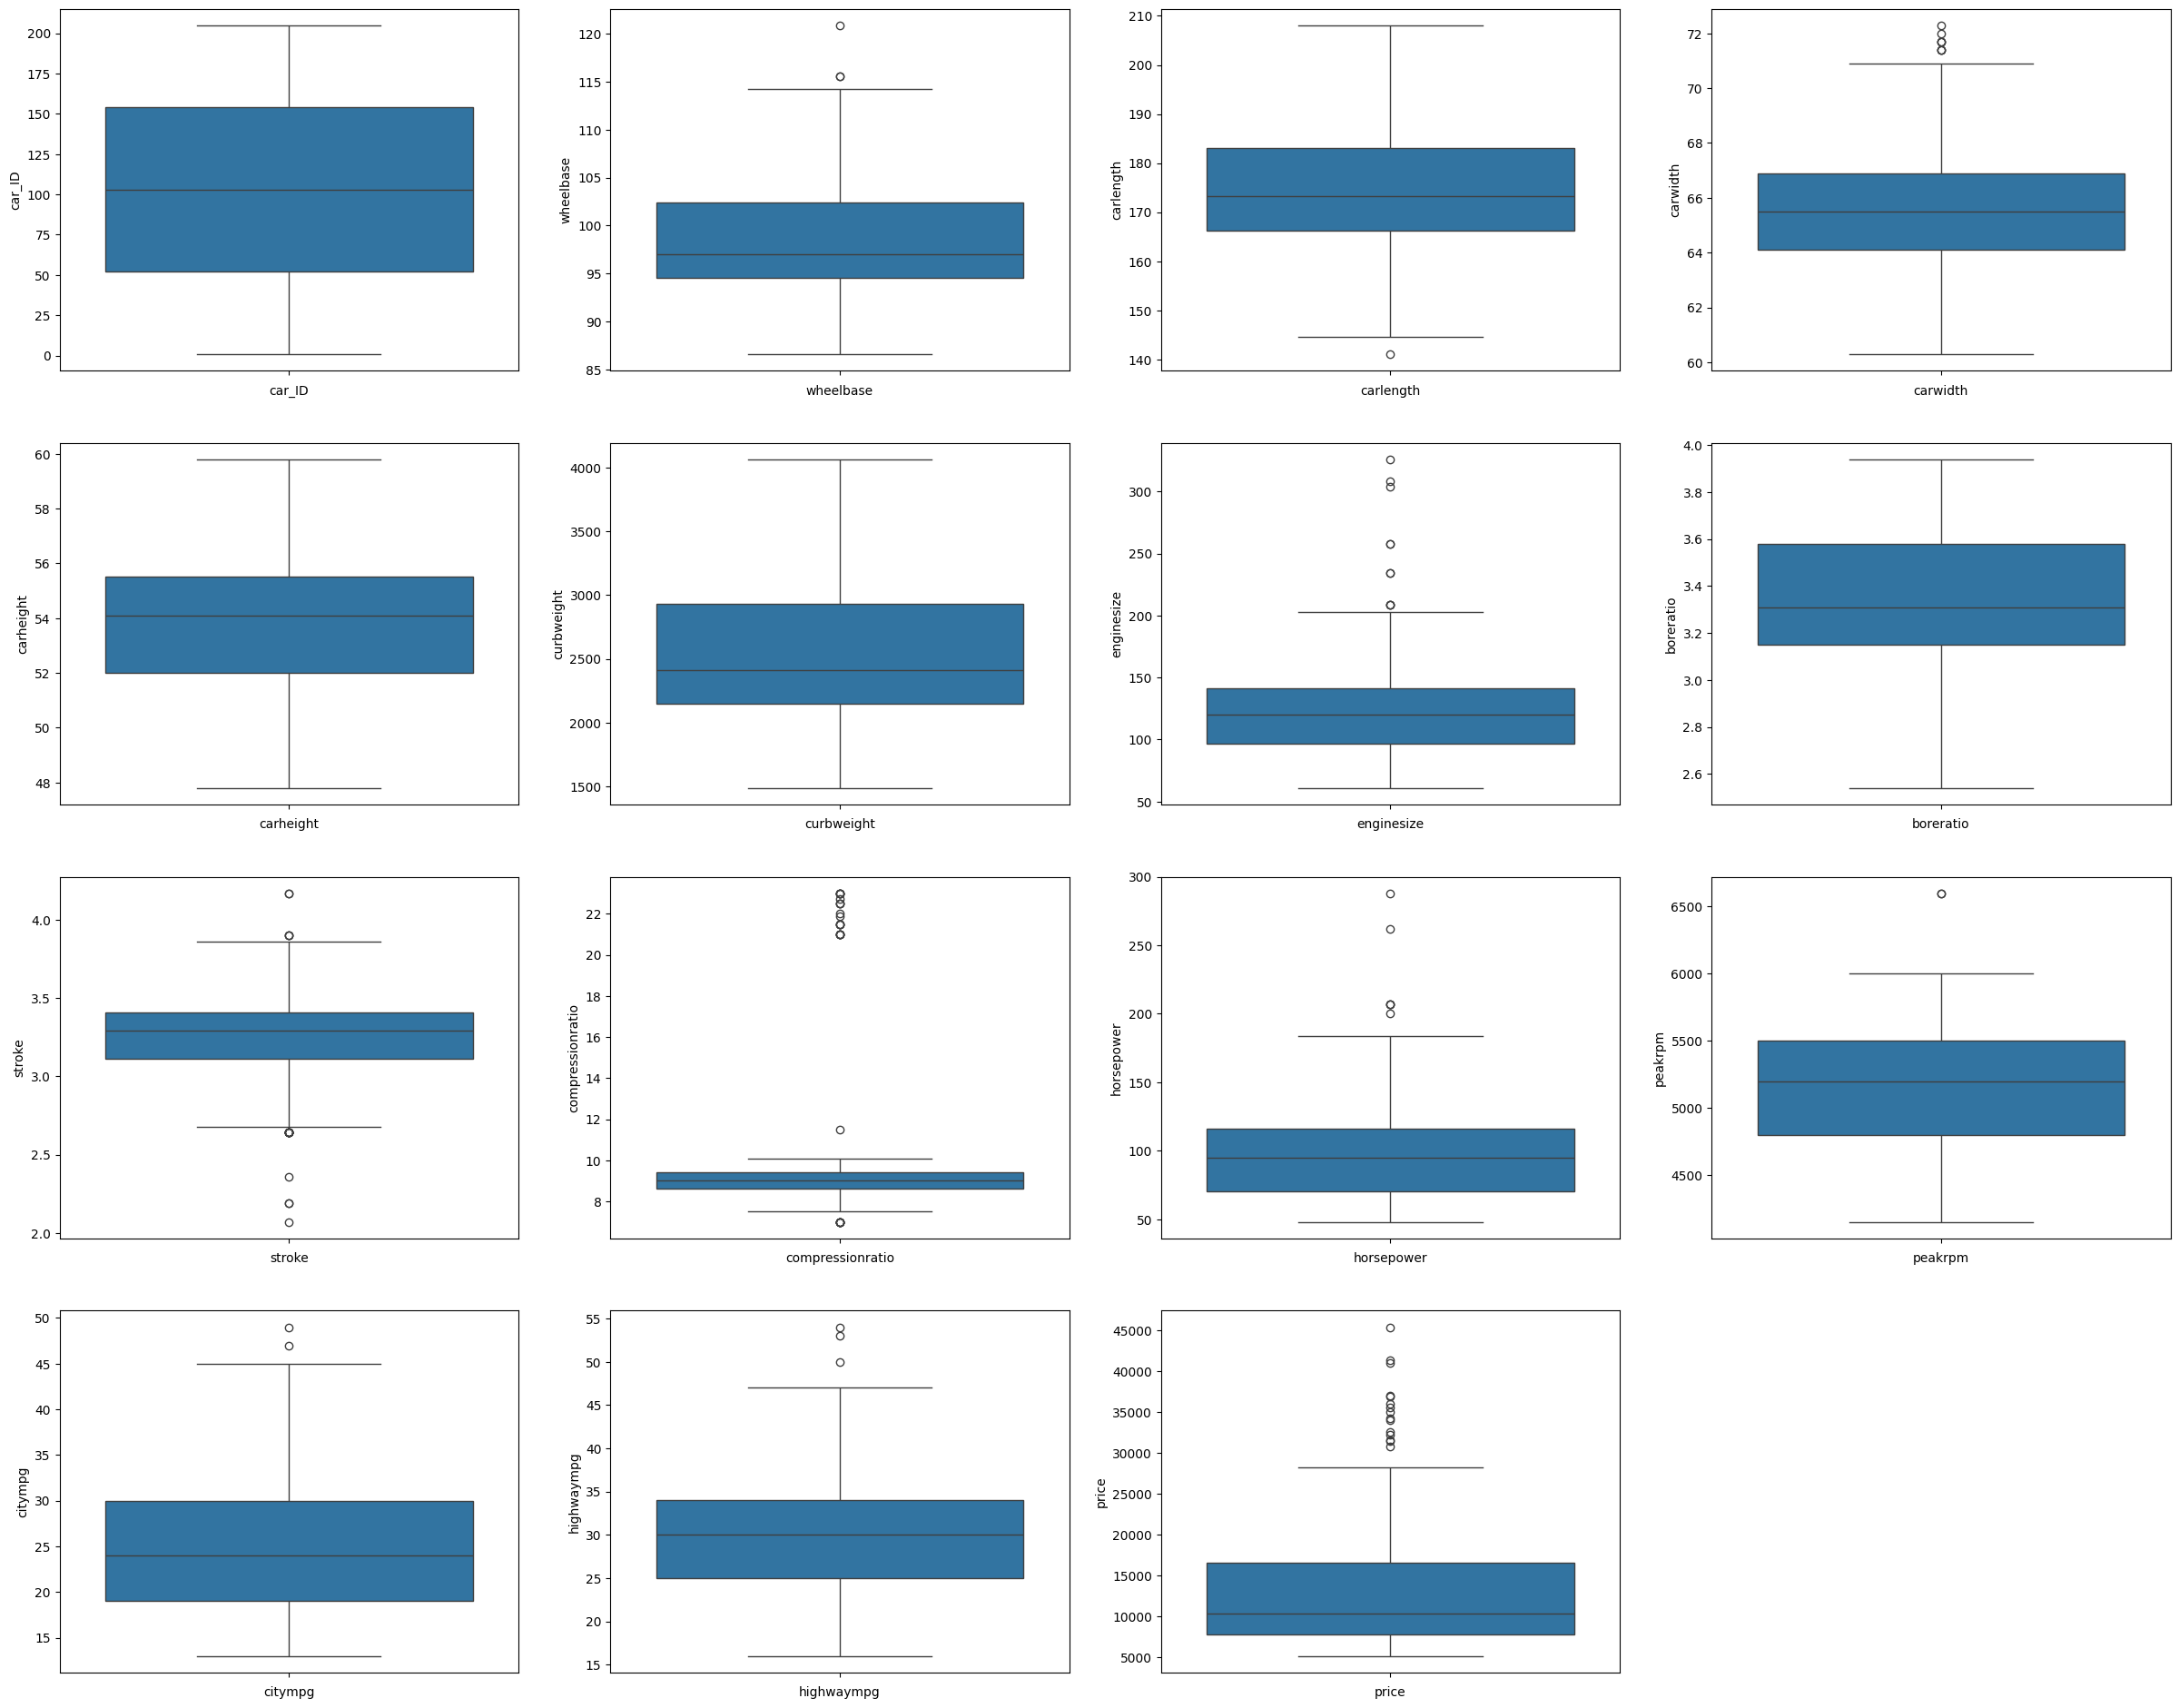

In [27]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_vars:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=car_data[col])
    plt.xlabel(col)
    counter = counter + 1

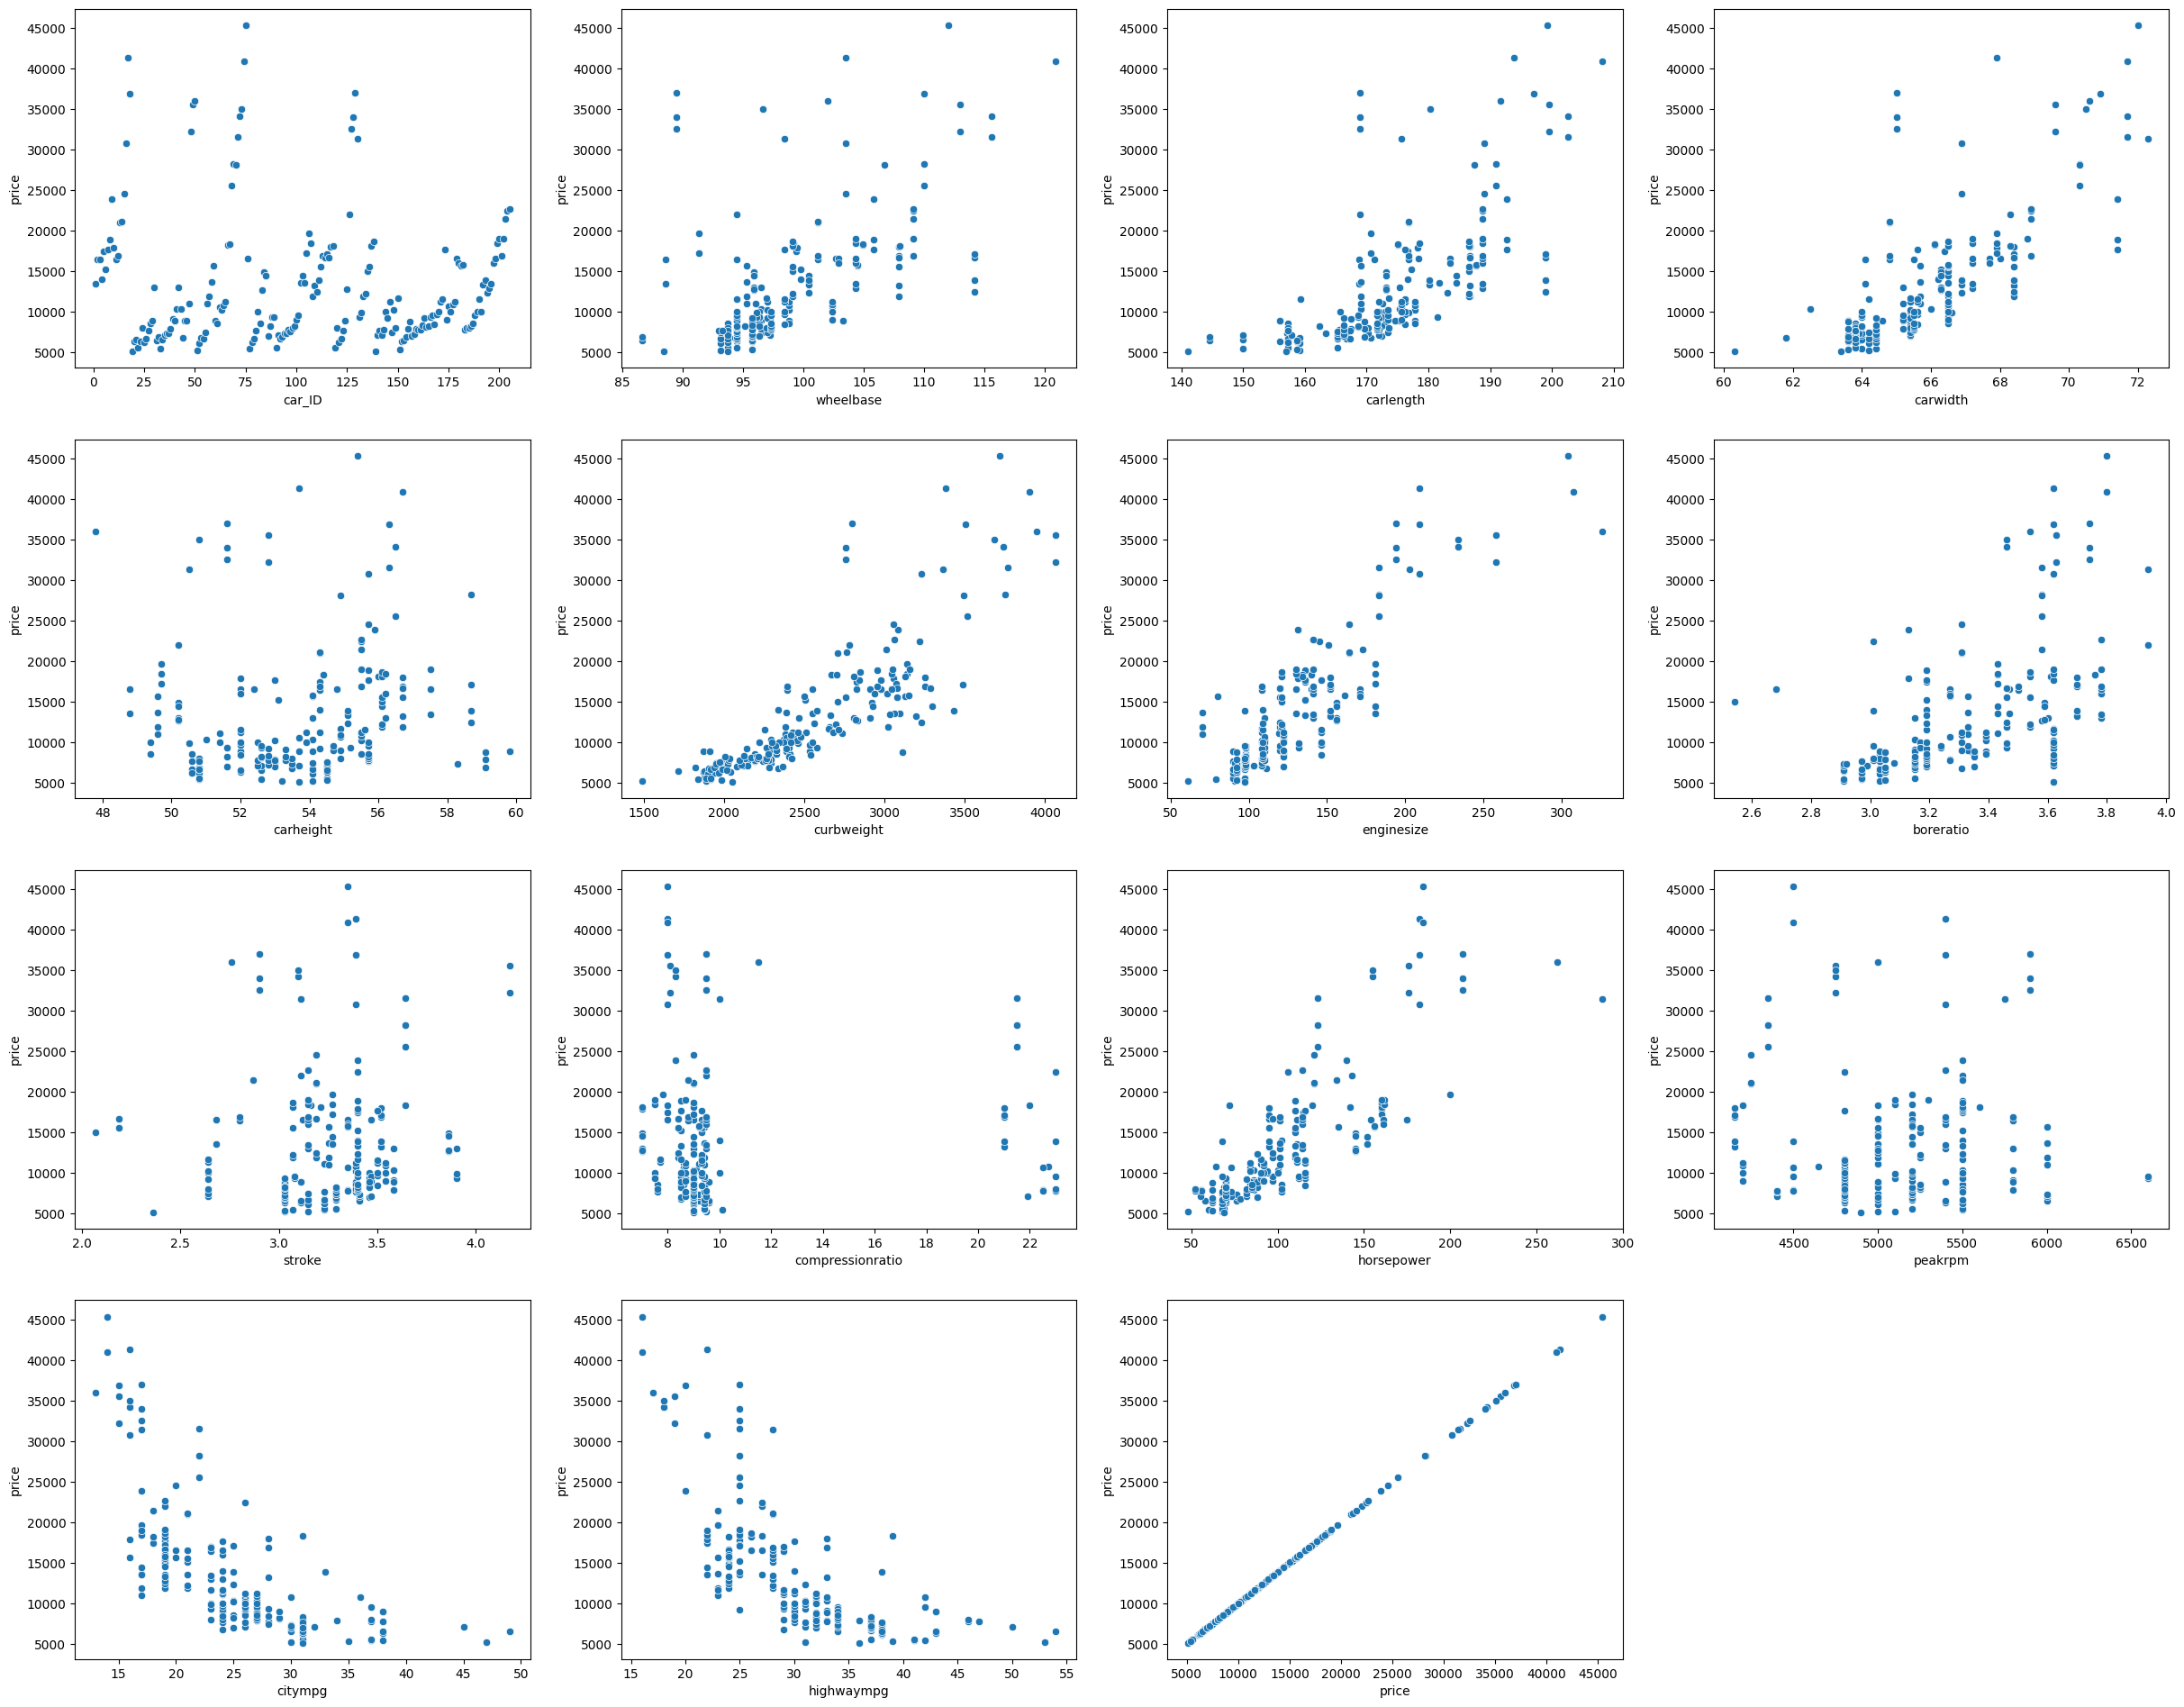

In [28]:
# scatter plot to visualize relationship between target variable ('price') & numerical variables
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_vars:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=car_data,x=col,y='price')
    plt.xlabel(col)
    counter = counter + 1

# feature selection

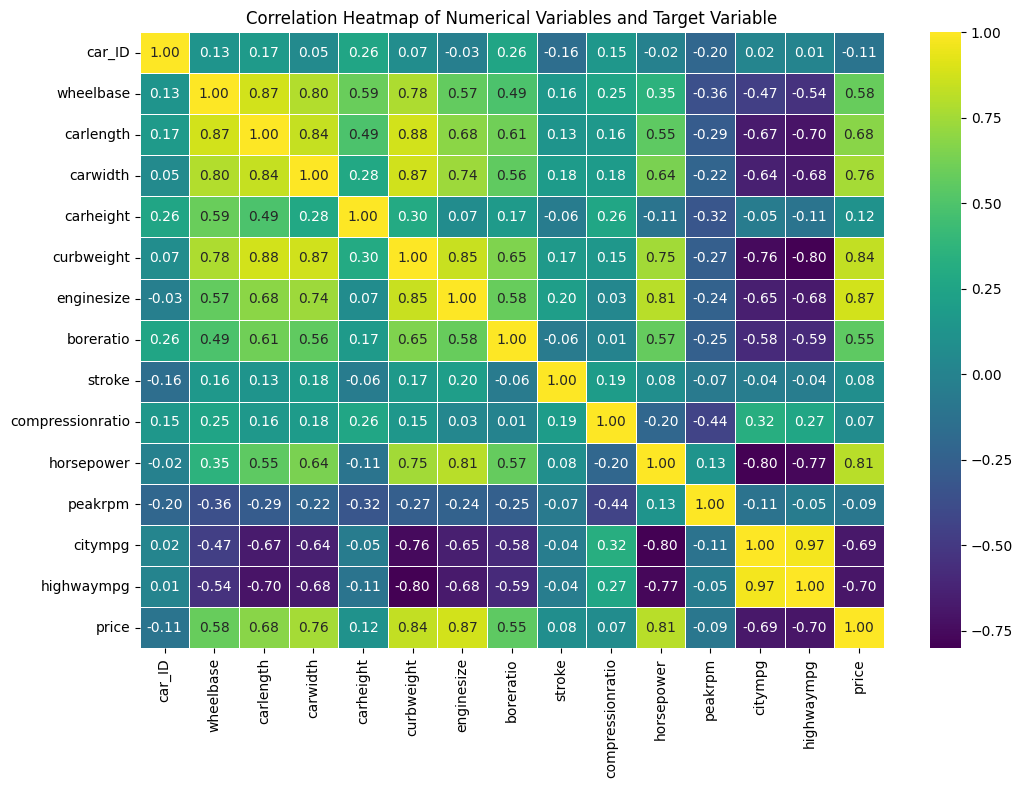

In [29]:
# Calculate the correlation matrix
correlation_matrix = car_data[numerical_vars].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

**highly correlated features**

1:carlength & wheelbase
2:carwidth & wheelbase
3:carwidth & carlength
4:curbweight & carlength
5:curbwieght & carwidth
6:enginesize &curbweight
7:citympg & highwaympg

<Axes: xlabel='wheelbase', ylabel='carlength'>

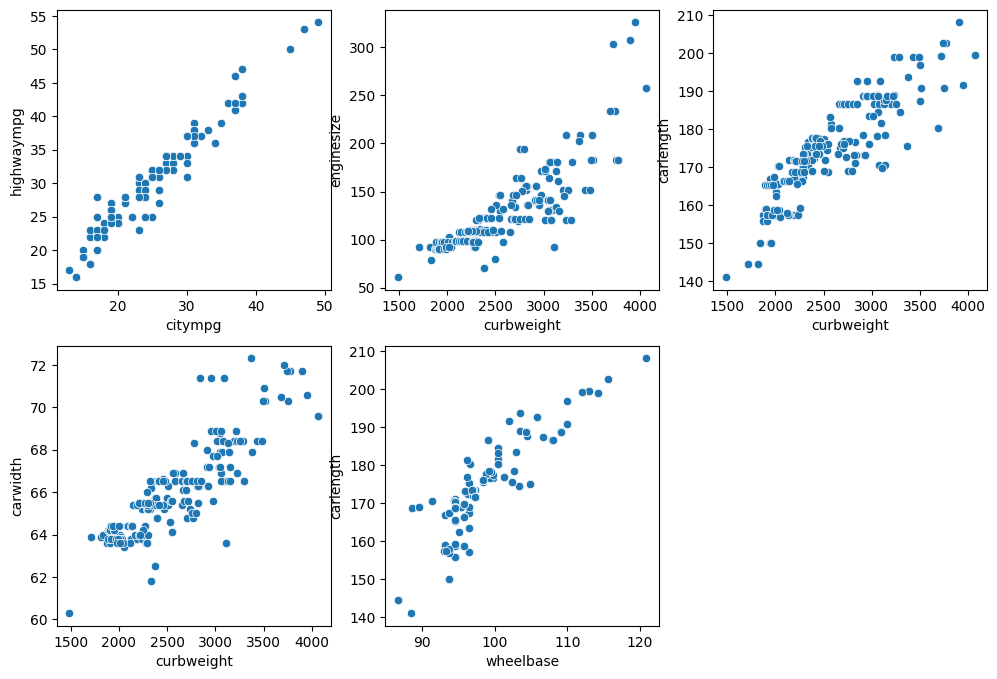

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=car_data,x='citympg',y='highwaympg')

plt.subplot(2,3,2)
sns.scatterplot(data=car_data,x='curbweight',y='enginesize')

plt.subplot(2,3,3)
sns.scatterplot(data=car_data,x='curbweight',y='carlength')

plt.subplot(2,3,4)
sns.scatterplot(data=car_data,x='curbweight',y='carwidth')

plt.subplot(2,3,5)
sns.scatterplot(data=car_data,x='wheelbase',y='carlength')

In [31]:
df1 = car_data.copy()

**drop highwaympg,curbweight,wheelbase due to multicolliearity**

In [32]:
df1.drop(['highwaympg','curbweight','wheelbase'],axis=1,inplace=True)


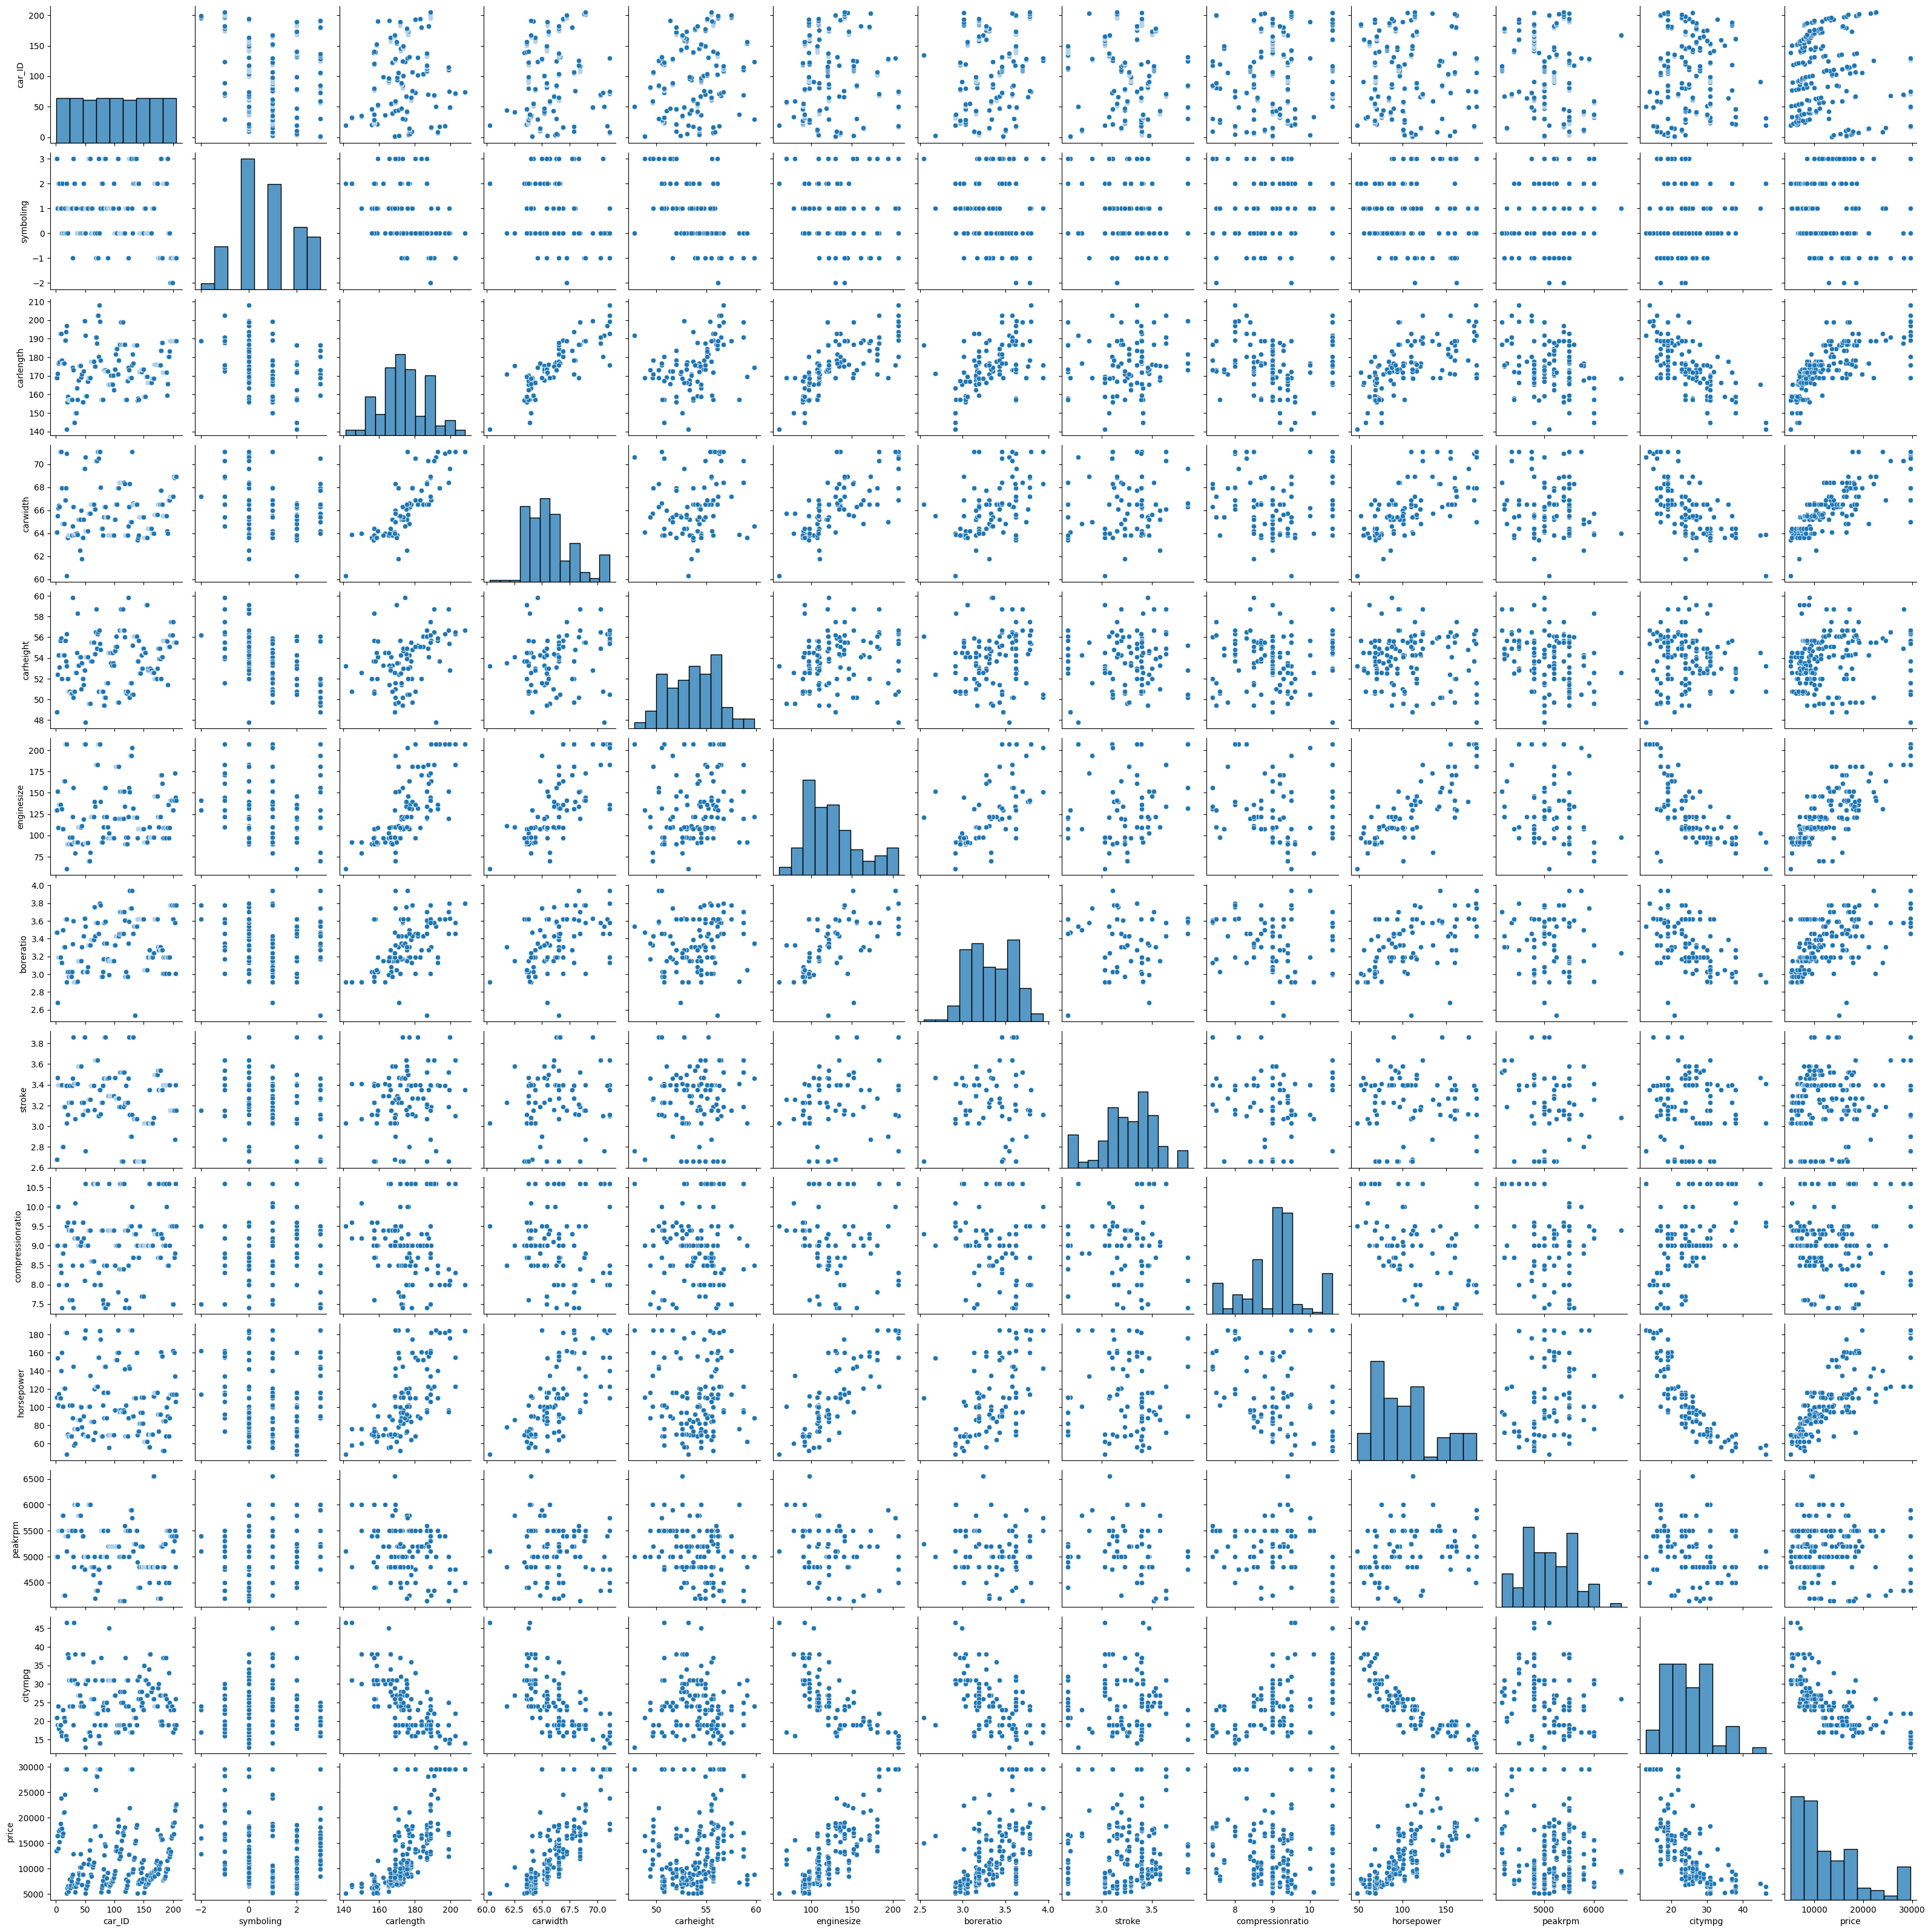

In [102]:
#pairwise scatter plot and observe linear relationships.
    
# Select only numerical variables
numerical_vars = df1.select_dtypes(include=['int64', 'float64'])

# Plot pair plot
sns.pairplot(numerical_vars)
plt.show()

# handling outlier

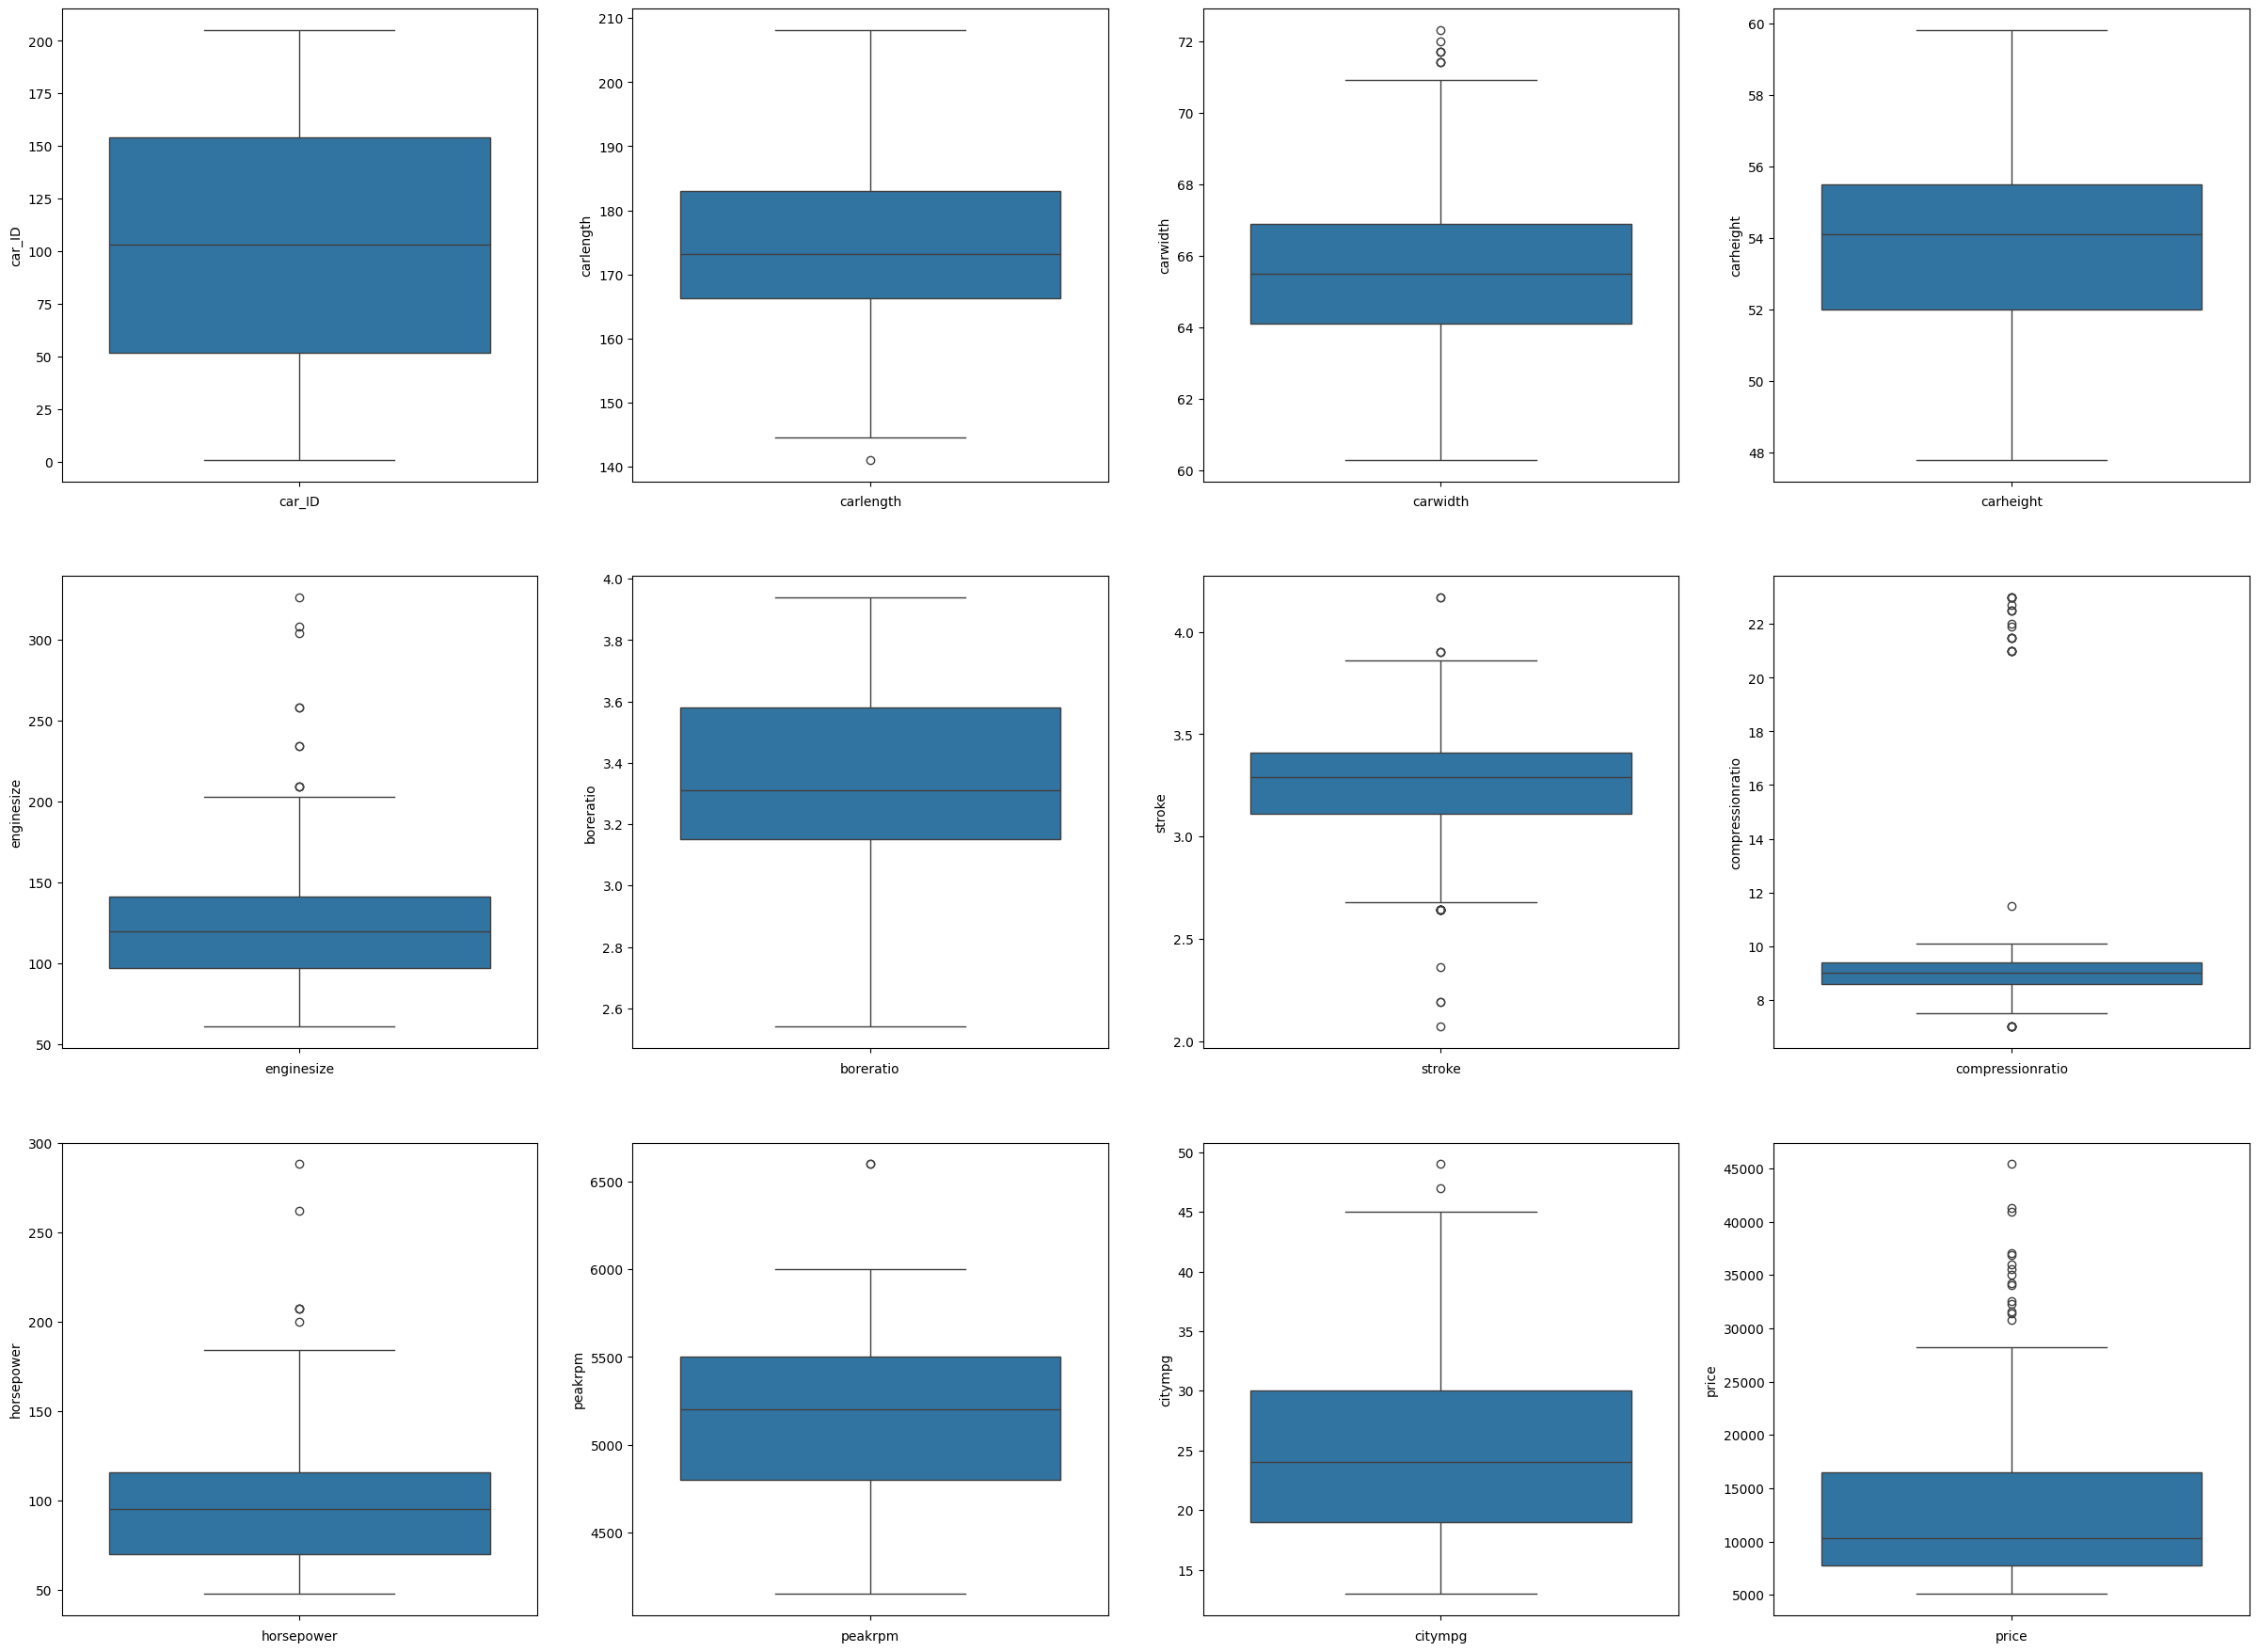

In [33]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

In [34]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [35]:
for i in df1.select_dtypes(include="number").columns:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i])   


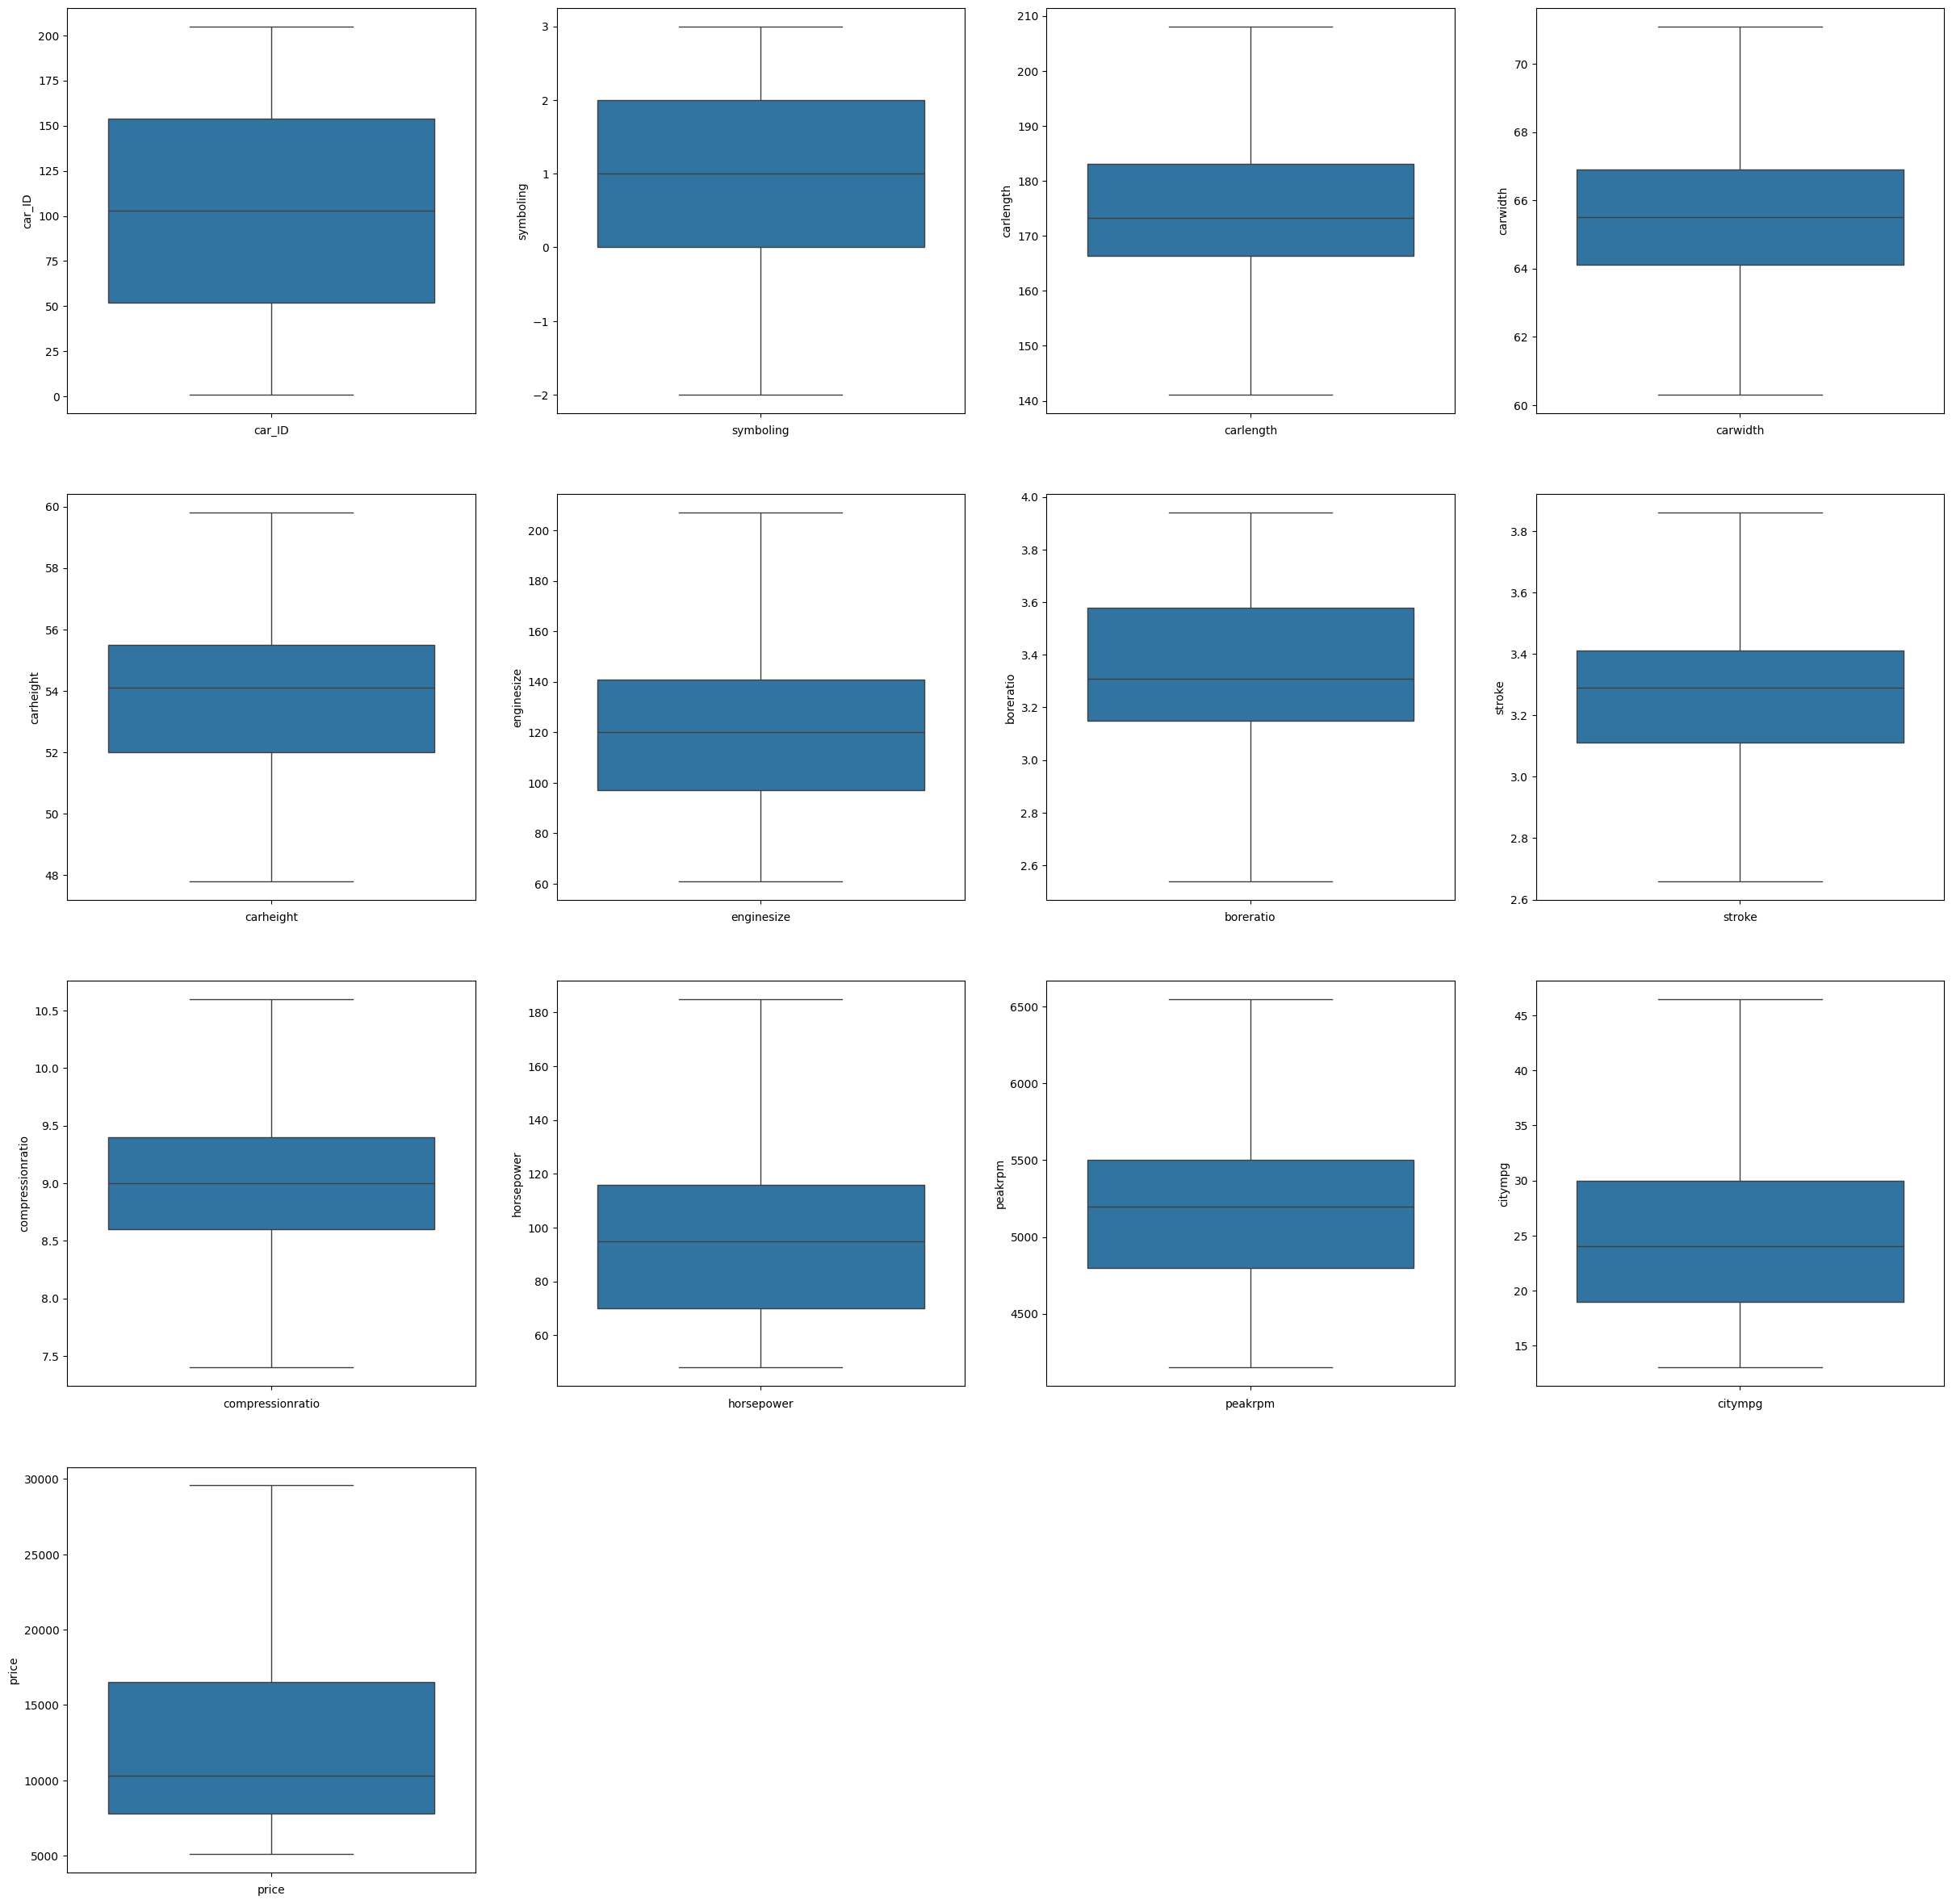

In [41]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

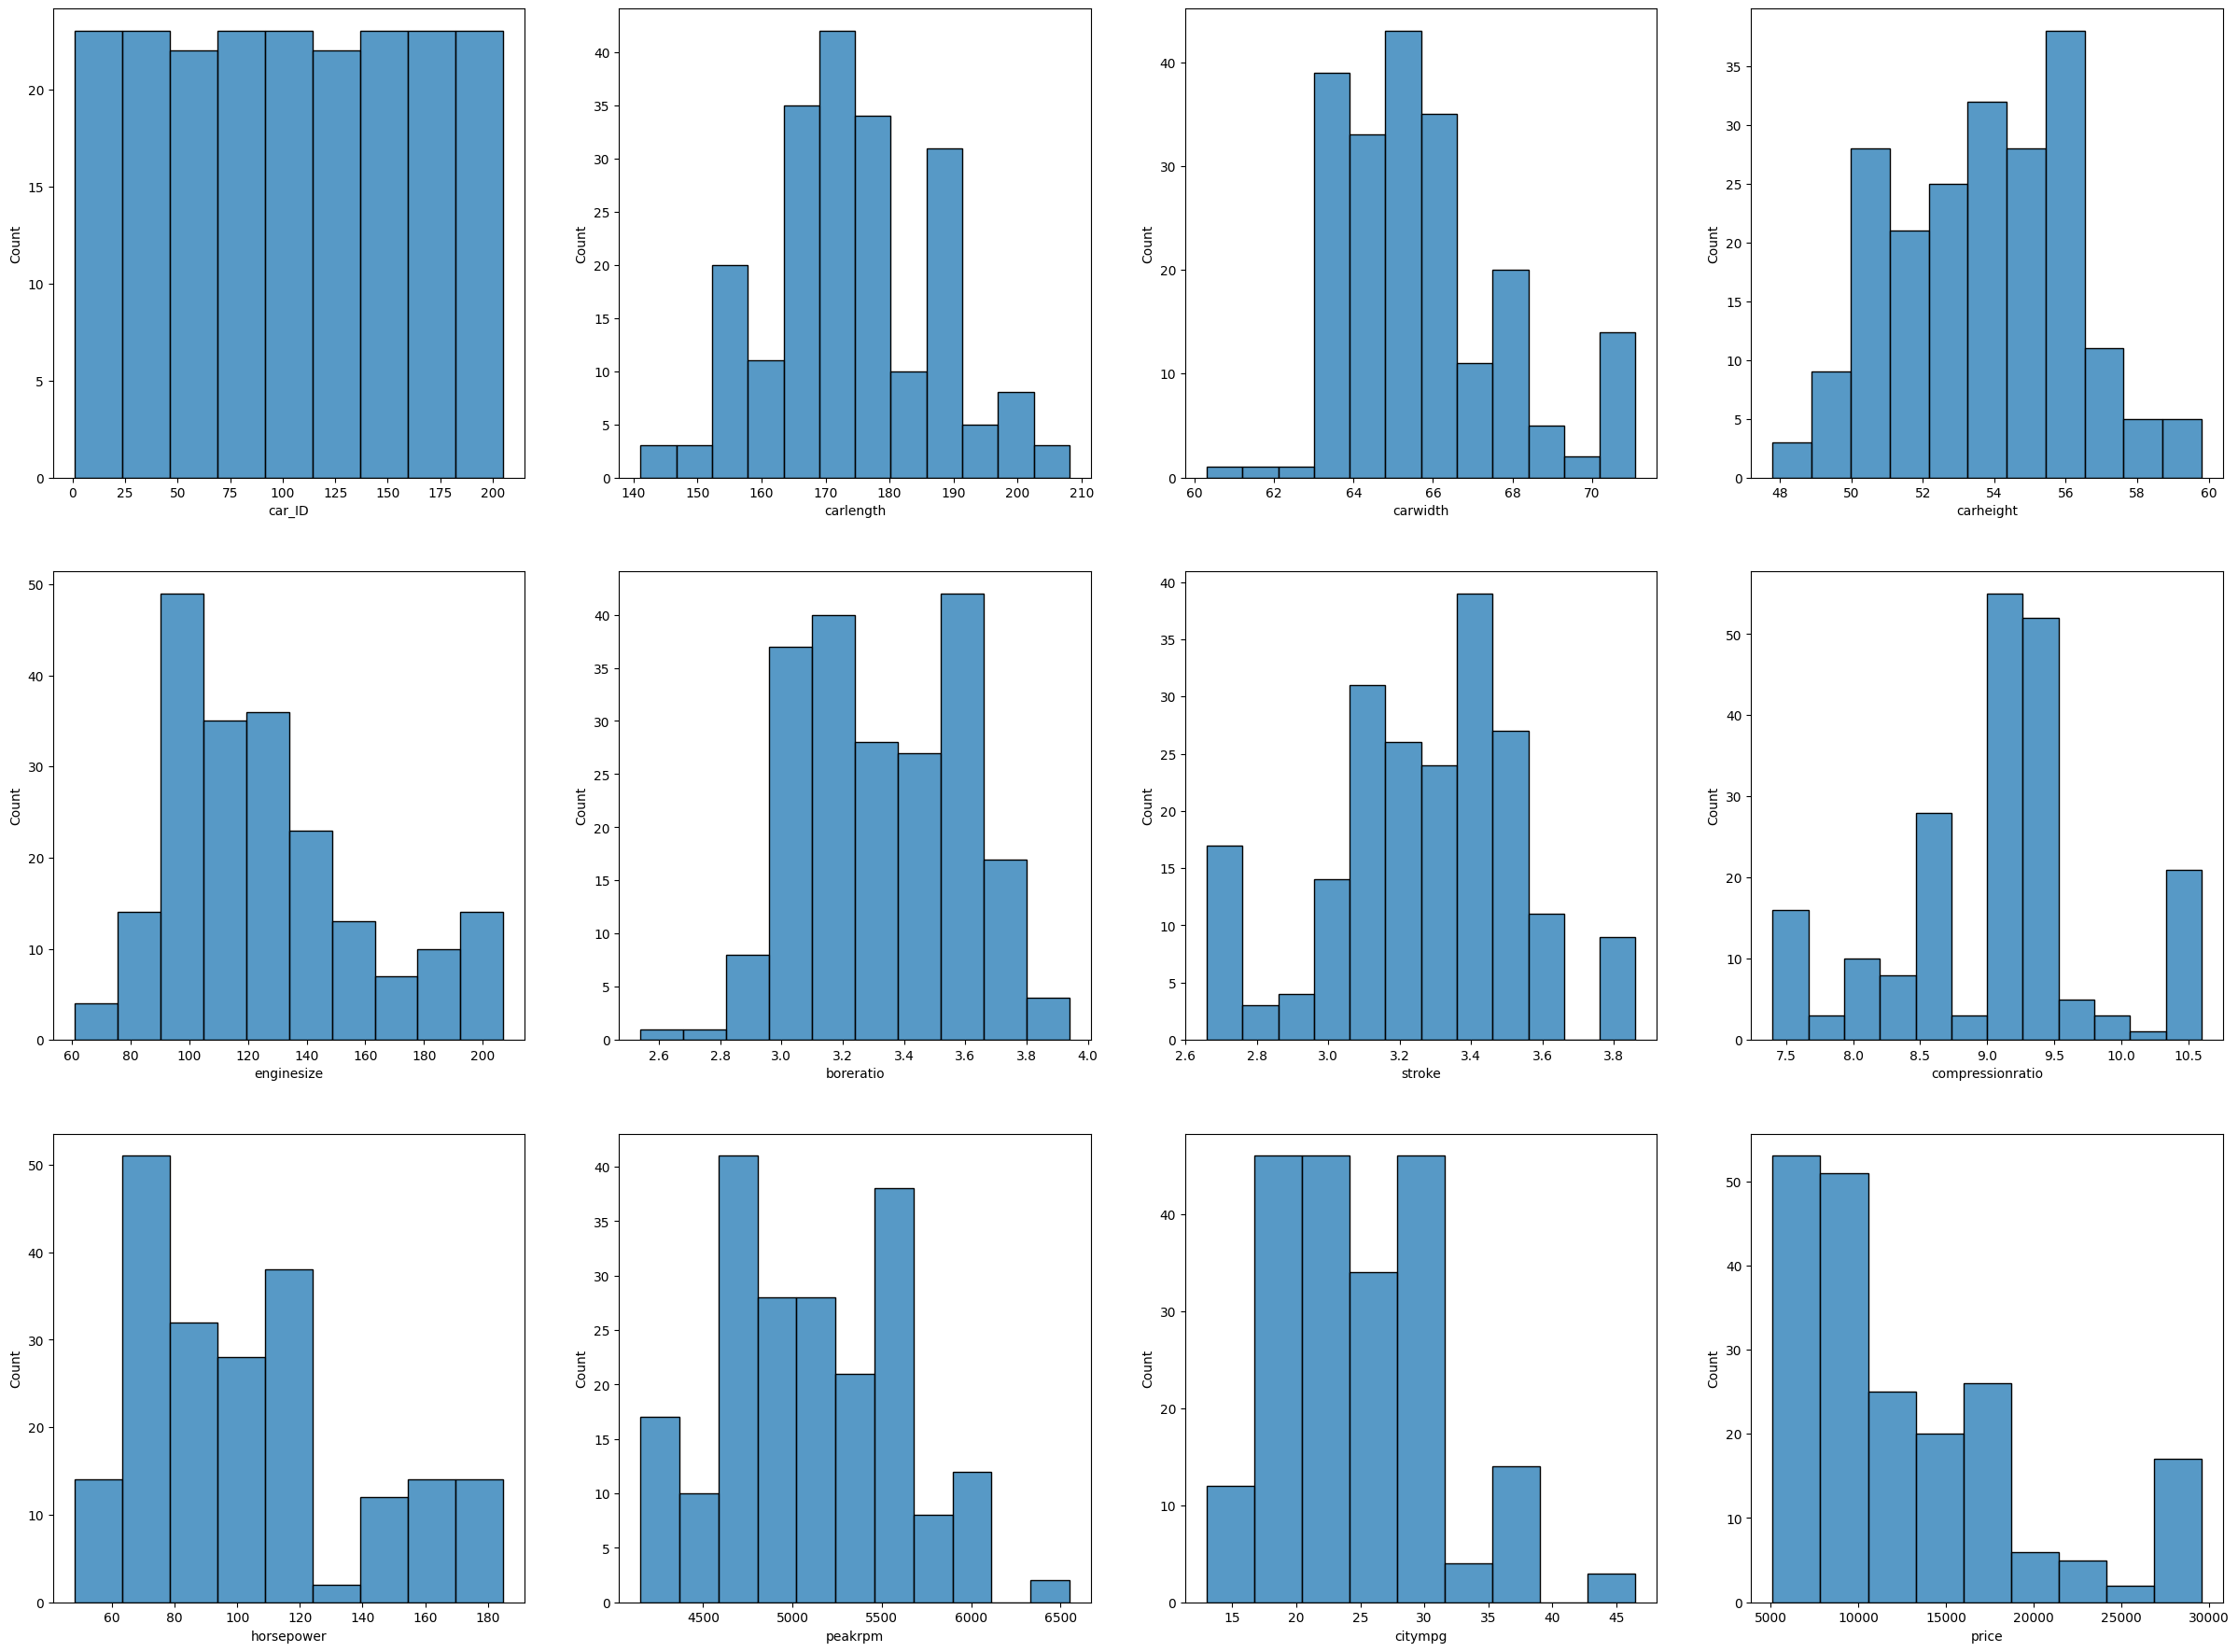

In [36]:
# To see the distribution of data after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.histplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

# encoding

In [37]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = list(df1.select_dtypes(include=['object']))
cols_to_encode


#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label = df1.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label[col] = label_encoder.fit_transform(df1[col])

print(df_label)

     car_ID  symboling  CompanyName  fueltype  aspiration  doornumber  \
0       1.0          5            1         1           0           1   
1       2.0          5            1         1           0           1   
2       3.0          3            1         1           0           1   
3       4.0          4            2         1           0           0   
4       5.0          4            2         1           0           0   
..      ...        ...          ...       ...         ...         ...   
200   201.0          0           22         1           0           0   
201   202.0          0           22         1           1           0   
202   203.0          0           22         1           0           0   
203   204.0          0           22         0           1           0   
204   205.0          0           22         1           1           0   

     carbody  drivewheel  enginelocation  carlength  ...  cylindernumber  \
0          0           2               0      1

# feature scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = ['carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(car_data[numerical_columns])

# Transform the data
scaled_data = scaler.transform(car_data[numerical_columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Initialize a new DataFrame to store after applying MinMaxScaler
df_car = df_label.copy()

# Replace scaled columns in the original DataFrame
df_car[numerical_columns] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_car)

     car_ID  symboling  CompanyName  fueltype  aspiration  doornumber  \
0       1.0          5            1         1           0           1   
1       2.0          5            1         1           0           1   
2       3.0          3            1         1           0           1   
3       4.0          4            2         1           0           0   
4       5.0          4            2         1           0           0   
..      ...        ...          ...       ...         ...         ...   
200   201.0          0           22         1           0           0   
201   202.0          0           22         1           1           0   
202   203.0          0           22         1           0           0   
203   204.0          0           22         0           1           0   
204   205.0          0           22         1           1           0   

     carbody  drivewheel  enginelocation  carlength  ...  cylindernumber  \
0          0           2               0   0.41

## seperate train and test dataset

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x = df_car.drop('price',axis=1)
y = df_car["price"]


In [41]:
x

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,1.0,5,1,1,0,1,0,2,0,0.413433,...,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222
1,2.0,5,1,1,0,1,0,2,0,0.413433,...,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222
2,3.0,3,1,1,0,1,2,2,0,0.449254,...,5,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667
3,4.0,4,2,1,0,0,3,1,0,0.529851,...,3,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556
4,5.0,4,2,1,0,0,3,0,0,0.529851,...,3,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0,0,22,1,0,0,3,2,0,0.711940,...,3,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778
201,202.0,0,22,1,1,0,3,2,0,0.711940,...,3,2,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667
202,203.0,0,22,1,0,0,3,2,0,0.711940,...,5,3,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889
203,204.0,0,22,0,1,0,3,2,0,0.711940,...,3,3,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111


In [42]:
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
66,67.0,2,10,0,0,0,3,2,0,0.505970,...,3,2,0.275472,3,0.635714,0.747619,0.93750,0.100000,0.020408,0.500000
111,112.0,2,14,1,0,0,3,2,0,0.680597,...,2,2,0.222642,5,0.657143,0.057143,0.08750,0.195833,0.346939,0.166667
153,154.0,2,20,1,0,0,4,1,0,0.426866,...,3,2,0.116981,1,0.364286,0.457143,0.12500,0.058333,0.265306,0.500000
96,97.0,3,13,1,0,0,3,1,0,0.361194,...,3,2,0.135849,1,0.435714,0.580952,0.15000,0.087500,0.428571,0.500000
38,39.0,2,7,1,0,1,2,1,0,0.394030,...,3,2,0.184906,0,0.435714,0.719048,0.12500,0.158333,0.673469,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107.0,3,13,1,0,1,2,2,0,0.558209,...,5,3,0.452830,5,0.635714,0.571429,0.12500,0.466667,0.428571,0.166667
14,15.0,3,3,1,0,0,3,2,0,0.714925,...,3,3,0.388679,5,0.550000,0.533333,0.12500,0.304167,0.040816,0.194444
92,93.0,3,13,1,0,0,3,1,0,0.361194,...,3,2,0.135849,1,0.435714,0.580952,0.15000,0.087500,0.428571,0.500000
179,180.0,5,20,1,0,1,2,2,0,0.632836,...,0,3,0.415094,5,0.521429,0.609524,0.14375,0.470833,0.428571,0.166667


# linear regression

In [46]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()

In [47]:
#Train the model with the provided training data
LinearModel.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = LinearModel.predict(x_test)
y_pred

array([ 0.52765633,  0.29526564,  0.12984788,  0.19717318,  0.53294852,
        0.02892233,  0.06804812,  0.0263573 ,  0.10692138,  0.04261706,
        0.22820004,  0.02944386,  0.26963027,  0.13342529,  0.85705753,
        0.01878816, -0.12686352,  0.22512227,  0.11622745,  0.12392771,
        0.16757745,  0.386176  ,  0.05593096, -0.04547433,  0.04663301,
        0.50061906,  0.21106348,  0.26830621,  0.01503156,  0.28370823,
        0.54183785,  0.03786861, -0.01287856,  0.43506179,  0.0679244 ,
        0.54748037,  0.12183267,  0.11442341,  0.03054793,  0.2259092 ,
        0.07123177])

In the fit() function, we have passed the x_train and y_train, which is our training dataset for the dependent and an independent variable. We have fitted our regressor object to the training set so that the model can easily learn the correlations between the predictor and target variables. After executing the above lines of code, we will get the below output.

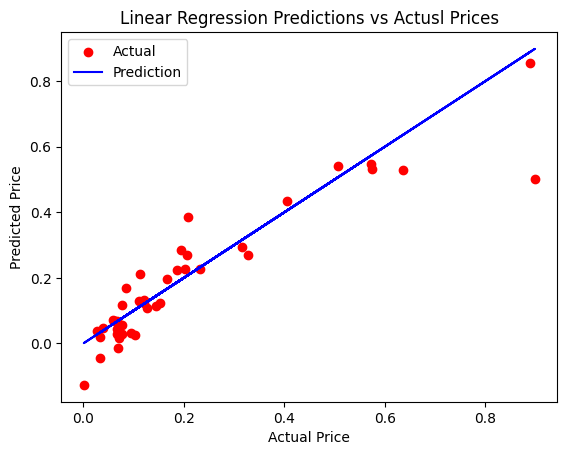

In [49]:
#Plot the actual target variable against the predicted values
plt.scatter(y_test, y_pred, color='red',label='Actual')
plt.plot(y_test,y_test,color='blue',label='Prediction') # Plot the prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Predictions vs Actusl Prices')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('Linear Regression')
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)
print("Mean Absolute Error(MAE):",MAE)
print("Mean Squared Error(MSE):",MSE)
print ("rmse:",RMSE)
print("R Squared:",r2)

Linear Regression
Mean Absolute Error(MAE): 0.053287845753041574
Mean Squared Error(MSE): 0.053287845753041574
rmse: 0.23084160316771665
R Squared: 0.8521384373077692


In [52]:
# lr.score(x_test, y_test) calculates the R-squared score on the test data .
LinearModel.score(x_test,y_test)


0.8521384373077692

In [53]:

#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearModel,x_train,y_train,cv=5)
scores

array([0.85185642, 0.90626379, 0.84273801, 0.84616031, 0.8766199 ])

In [54]:
scores.mean()

0.8647276852500723

after executing this line of code,predicted train will predictd values for the out based on input in training data.these predicted value can be compared with the actual target values(y_train) to evaluate the performance of model or for any further analysis



# decision tree algorithm

In [55]:
from sklearn.tree import DecisionTreeRegressor

#creating object for DecisionTree Regression class
DecisionTree = DecisionTreeRegressor(random_state=42)


In [56]:
#training the model with the provided training data
DecisionTree.fit(x_train,y_train)



DecisionTreeRegressor(random_state=42)

In [57]:
Decision_PredictedTest = DecisionTree.predict(x_test)
Decision_PredictedTest


array([0.78849114, 0.3061417 , 0.09510451, 0.17506579, 0.65741522,
       0.0416315 , 0.06901346, 0.07638648, 0.10376843, 0.07142148,
       0.25798123, 0.07298545, 0.24206842, 0.15217715, 1.        ,
       0.03028648, 0.02921901, 0.24206842, 0.04644754, 0.10376843,
       0.12851894, 0.23040068, 0.0416315 , 0.00672757, 0.06183903,
       0.78849114, 0.08269202, 0.28293034, 0.05538454, 0.2697731 ,
       0.65741522, 0.03850355, 0.09085944, 0.29112259, 0.07047813,
       0.65741522, 0.09510451, 0.16699767, 0.0942977 , 0.24206842,
       0.07186833])

In [58]:
print("Decision Tree Regressor:")
mae=mean_absolute_error(y_test, Decision_PredictedTest)
mse=mean_squared_error(y_test, Decision_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Decision_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)


Decision Tree Regressor:
Mean Absolute Error(MAE): 0.04203364269703469
Mean Squared Error(MSE): 0.0033741755002732383
rmse: 0.05808765359586526
R Squared: 0.9306461658951724


In [59]:
DecisionTree.score(x_test,y_test)

0.9306461658951724

In [60]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree,x_train,y_train, cv=5)


In [61]:
scores

array([0.84808917, 0.83060115, 0.72170376, 0.90644837, 0.91004173])

In [62]:
scores.mean()

0.843376834378583

# random forest

In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [64]:
Random_PredictedTest=random_forest.predict(x_test)
Random_PredictedTest


array([0.77671044, 0.34512983, 0.11289757, 0.21190805, 0.53850504,
       0.03879276, 0.06420932, 0.07586565, 0.13889007, 0.07421727,
       0.29860186, 0.06606698, 0.26543146, 0.14367956, 0.85630133,
       0.03052182, 0.01397349, 0.23278238, 0.06491659, 0.12547143,
       0.11867906, 0.2418579 , 0.03693287, 0.01684537, 0.05086441,
       0.77672434, 0.10115684, 0.28074971, 0.05613127, 0.28128966,
       0.5413691 , 0.03212527, 0.0776955 , 0.35118936, 0.08237501,
       0.53836825, 0.14308972, 0.18177101, 0.07163535, 0.23278238,
       0.08661114])

In [65]:
print("Random Forest:")
mae=mean_absolute_error(y_test, Random_PredictedTest)
mse=mean_squared_error(y_test, Random_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Random_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Random Forest:
Mean Absolute Error(MAE): 0.03257010817638089
Mean Squared Error(MSE): 0.002050506727773773
rmse: 0.04528252121706313
R Squared: 0.9578532582501001


In [66]:
random_forest.score(x_test,y_test)


0.9578532582501001

In [67]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree,x_train,y_train,cv=5)
scores


array([0.84808917, 0.83060115, 0.72170376, 0.90644837, 0.91004173])

In [68]:
scores.mean()

0.843376834378583

# gradient boosting regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting = GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train,y_train)


GradientBoostingRegressor(random_state=42)

In [70]:
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest


array([ 0.80328583,  0.34559548,  0.10070717,  0.22932042,  0.67942259,
        0.03936769,  0.06891565,  0.07051875,  0.12835101,  0.07000499,
        0.29465419,  0.06545105,  0.28770042,  0.13676589,  0.93988478,
        0.03013364, -0.00223967,  0.21774458,  0.05468866,  0.12232196,
        0.13151084,  0.24219062,  0.03033357,  0.01963194,  0.04047795,
        0.81987873,  0.14438048,  0.28021931,  0.05241826,  0.28021931,
        0.68863512,  0.03194658,  0.07823715,  0.39151472,  0.0800708 ,
        0.65425998,  0.14811162,  0.18681698,  0.06431373,  0.21774458,
        0.08589364])

In [71]:
print("Gradient Boosting Regressor:")
mae=mean_absolute_error(y_test, Gradient_PredictedTest)
mse=mean_squared_error(y_test, Gradient_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Gradient_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Gradient Boosting Regressor:
Mean Absolute Error(MAE): 0.038379644845379875
Mean Squared Error(MSE): 0.003171966747667689
rmse: 0.05632021615430546
R Squared: 0.9348024263746921


In [72]:
GradientBoosting.score(x_test,y_test)


0.9348024263746921

In [73]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GradientBoosting,x_train,y_train,cv=5)
scores

array([0.88857004, 0.94320815, 0.85404464, 0.93586588, 0.89968771])

In [74]:
scores.mean()

0.9042752850578522

# support vector regressor

In [75]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [83]:
svr_Predicted_Test = svr_model.predict(x_test)
svr_Predicted_Test


array([0.22514657, 0.23474391, 0.16157863, 0.18341401, 0.20004753,
       0.15493711, 0.16365057, 0.15022425, 0.17809023, 0.18155383,
       0.21412846, 0.1535065 , 0.18022936, 0.19185462, 0.22249297,
       0.14486514, 0.16926819, 0.19471961, 0.15128892, 0.17924888,
       0.1333075 , 0.20111821, 0.15741572, 0.13313019, 0.15539341,
       0.22252827, 0.18347692, 0.2268669 , 0.1567338 , 0.22346208,
       0.19893824, 0.16134124, 0.14263309, 0.24711013, 0.19091086,
       0.19852317, 0.17765276, 0.13877962, 0.13391628, 0.19715548,
       0.14719815])

In [84]:
print("Support Vector Machine(SVM):")
mae=mean_absolute_error(y_test, svr_Predicted_Test)
mse=mean_squared_error(y_test, svr_Predicted_Test)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,svr_Predicted_Test)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Support Vector Machine(SVM):
Mean Absolute Error(MAE): 0.13011912846209947
Mean Squared Error(MSE): 0.04136566513514141
rmse: 0.20338550866554236
R Squared: 0.14975748084646734


In [78]:
svr_model.score(x_test,y_test)


0.14975748084646734

In [79]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr_model,x_train,y_train,cv=5)
scores

array([0.14686517, 0.16679884, 0.13562595, 0.03959208, 0.02746218])

In [80]:
scores.mean()

0.10326884263845135

In [82]:
import pandas as pd

# Evaluation metrics result
evaluation_metrics = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest', 'Gradient Boosting Regressor', 'Support Vector Machine(SVM)'],
    'Mean Absolute Error (MAE)': [0.06378864380409804, 0.044300688075894205, 0.03430506315493195, 0.03842768977002852,  0.13011912846209947],
    'Mean Squared Error (MSE)': [0.009669256344642758, 0.003760117439847213, 0.002156935333968973, 0.00300650,0.04136566513514141],
    'Root Mean Squared Error (RMSE)': [0.0983323768890123, 0.061319796475911535, 0.046442817894363095, 0.05632021615430546, 0.20338550866554236],
    'R Squared (R^2)': [0.8012551509578856, 0.9227133973568609, 0.955665692162482, 0.9348024263746921, 0.149757480846467340]
}

# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
evaluation_df

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R Squared (R^2)
0,Linear Regression,0.063789,0.009669,0.098332,0.801255
1,Decision Tree Regressor,0.044301,0.003760,0.061320,0.922713
2,Random Forest,0.034305,0.002157,0.046443,0.955666
3,Gradient Boosting Regressor,0.038428,0.003007,0.056320,0.934802
4,Support Vector Machine(SVM),0.130119,0.041366,0.203386,0.149757


In conclusion, Random Forest emerges as the optimal choice for predicting the target variable in this dataset, followed by Gradient Boosting Regressor and Decision Tree Regressor. These ensemble methods demonstrate superior predictive capability and robustness, making them suitable for real-world applications where accuracy is paramount.


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_name= []
RMSE = []
R2_score = []

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

for model in models :
    model.fit(x_train , y_train)
    
    prediction = model.predict(x_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error( prediction , y_test, squared=False )))
    R2_score.append(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [86]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,R2_Score
Model-Name,,
RandomForestRegressor,0.044741487824081244,95.8854376153162 %
GradientBoostingRegressor,0.055327913906599566,93.70796109653794 %
DecisionTreeRegressor,0.05774192608609426,93.14692727641867 %
LinearRegression,0.08481569831110843,85.21384373077692 %
SVR,0.20338550866554236,14.975748084646733 %
